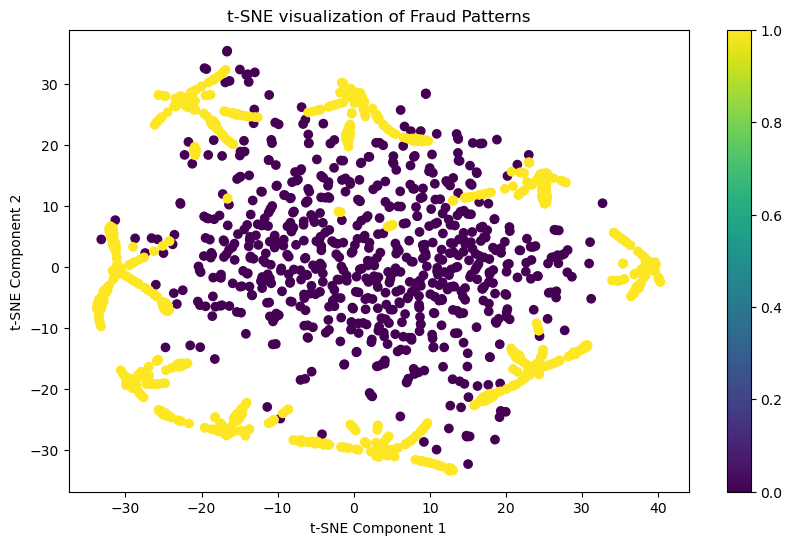

ROC-AUC Score: 0.9721283783783784


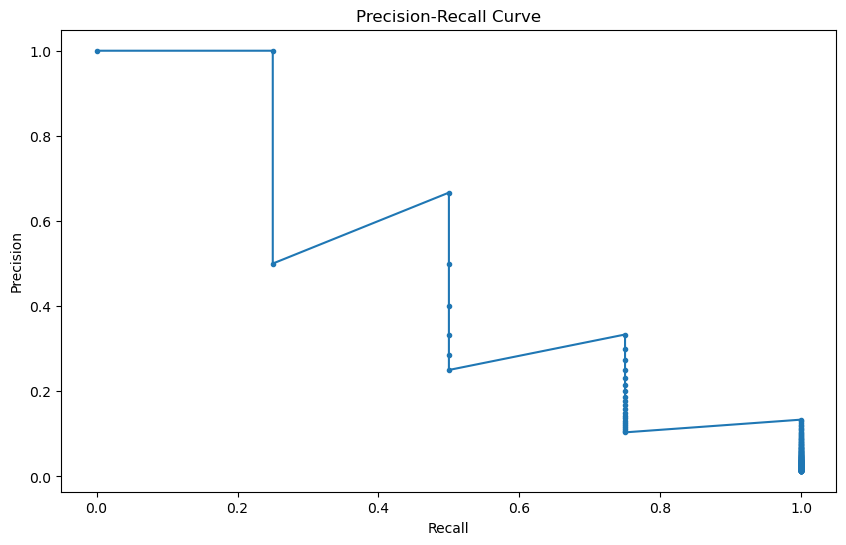

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification



data = pd.read_csv("Credit_Card.csv")

# Drop unnecessary columns
data.drop(['Time'], axis=1, inplace=True)

# Define features (X) and target (y)
X = data.drop("Class", axis=1)
y = data['Class']


# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.99, 0.01], random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Model with Balanced Class Weight
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_res)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_res, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of Fraud Patterns')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Evaluate Model with ROC-AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
